<h1 align="center">  Object Detection with YOLOv5 </h1>

This tutorial will illustrate how to train a YOLOv5 object detection model via our AI training platform.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/ai_training/detection/yolov5/yolov5

/content/drive/MyDrive/ai_training/detection/yolov5/yolov5


# Prerequisites
First of all, we have to install the libraries. Python>=3.8 is required. For other libraries, you can check the `requirements.txt` file. Installing these packages is simple. You can install them by running:


In [16]:
!pip install -r requirements.txt

     |████████████████████████████████| 471kB 9.6MB/s 
  Created wheel for onnx-simplifier: filename=onnx_simplifier-0.3.6-cp37-none-any.whl size=12877 sha256=38a8a809f7065b4d5280a3103c3ae60cb3ecc2797c54ec9920b31c34dd48e7da
  Stored in directory: /root/.cache/pip/wheels/6b/ad/63/753b75e81c462465ed01abfed4bb0d3ce61f415e4ee72a6c87
Successfully built onnx-simplifier


# Dataset & Preparation

Next, we need a dataset for the training model. In this tutorial, let's use the COCO 128 dataset. This dataset has been saved in `/coco128` next to the `/yolov5` directory.

In [4]:
!ls ../

coco128  exporting  generate_npy  image_data  yolov5


The `coco128.yaml` is prepared under the folder `/yolov5/data/`.

In [5]:
!cat data/coco128.yaml

# COCO 2017 dataset http://cocodataset.org - first 128 training images
# Train command: python train.py --data coco128.yaml
# Default dataset location is next to /yolov5:
#   /parent_folder
#     /coco128
#     /yolov5


# download command/URL (optional)
download: https://github.com/ultralytics/yolov5/releases/download/v1.0/coco128.zip

# train and val data as 1) directory: path/images/, 2) file: path/images.txt, or 3) list: [path1/images/, path2/images/]
train: ../coco128/images/train2017/  # 128 images
val: ../coco128/images/train2017/  # 128 images

# number of classes
nc: 80

# class names
names: ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light',
        'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
        'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
        'skis', 'snowboard', 'sports ball', 'kite', 'baseball ba

# Train 

We download the pretrained model from [Model_Zoo](https://github.com/kneron/Model_Zoo/tree/main/detection/yolov5/yolov5s-noupsample). Suppose we would like to finetune a pretrained model for 520 and just run 2 epochs. Execute commands in the folder `yolov5`:

In [7]:
!wget https://raw.githubusercontent.com/kneron/Model_Zoo/main/detection/yolov5/yolov5s-noupsample/best.pt

--2021-06-23 23:45:37--  https://raw.githubusercontent.com/kneron/Model_Zoo/main/detection/yolov5/yolov5s-noupsample/best.pt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13758885 (13M) [application/octet-stream]
Saving to: ‘best.pt.1’

best.pt.1           100%[===================>]  13.12M  46.7MB/s    in 0.3s    

2021-06-23 23:45:38 (46.7 MB/s) - ‘best.pt.1’ saved [13758885/13758885]



In [8]:
!CUDA_VISIBLE_DEVICES='0' python train.py --data coco128.yaml --cfg yolov5s-noupsample.yaml --weights 'best.pt' --batch-size 8 --epoch 2

Using torch 1.9.0+cu102 CUDA:0 (Tesla T4, 15109MB)

Namespace(adam=False, batch_size=8, bucket='', cache_images=False, cfg='./models/yolov5s-noupsample.yaml', data='./data/coco128.yaml', device='', epochs=2, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[640, 640], local_rank=-1, log_imgs=16, multi_scale=False, name='exp', noautoanchor=False, nosave=False, notest=False, project='runs/train', rect=False, resume=False, save_dir='runs/train/exp', single_cls=False, sync_bn=False, total_batch_size=8, weights='best.pt', workers=8, world_size=1)
Start Tensorboard with "tensorboard --logdir runs/train", view at http://localhost:6006/
2021-06-23 23:45:57.157154: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
Hyperparameters {'lr0': 0.01, 'lrf': 0.2, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8, 'warmup_bias_lr': 0.1, 'box': 

The trained model weights are saved in `runs/train/exp/weights/best.pt`


# Generating .npy for different model input
We can generating `.npy` for different model input by using `yolov5_generate_npy.py`. Execute commands in the folder `generate_npy`:

In [9]:
cd ../generate_npy

/content/drive/My Drive/ai_training/detection/yolov5/generate_npy


In [10]:
!python yolov5_generate_npy.py

We could get `*.npy` files.

In [11]:
!ls ../generate_npy

20_640x640.npy	40_640x640.npy	80_640x640.npy	yolov5_generate_npy.py


# Configure the paths yaml file
You are expected to create a yaml file which stores all the paths related to the trained models. You can check and modify the `pretrained_paths_520.yaml` and `pretrained_paths_720.yaml` under `/yolov5/data/`. Here is the config for our model trained on COCO128 `model_paths_520_coco128.yaml`:

In [12]:
cd ../yolov5/

/content/drive/My Drive/ai_training/detection/yolov5/yolov5


In [13]:
!cat data/model_paths_520_coco128.yaml

grid_dir: ../generate_npy/
grid20_path: ../generate_npy/20_640x640.npy
grid40_path: ../generate_npy/40_640x640.npy
grid80_path: ../generate_npy/80_640x640.npy

yolov5_dir: ./
path: ./runs/train/exp/weights/best.pt
yaml_path: ./models/yolov5s-noupsample.yaml
pt_path: ./yolov5s-noupsample-coco128.pt  # pytorch 1.4
onnx_export_file: ./yolov5s-noupsample-coco128.onnx

input_w: 640
input_h: 640
# number of classes
nc: 80
# class names
names: ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light',
        'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
        'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
        'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard',
        'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
        '

# Save and Convert to ONNX
For now, we have trained the YOLOv5 model. This section will walk you through how to save the trained model for onnx converter supported format and convert to ONNX. 


## Exporting onnx model in the pytorch1.7 environment
We can convert the model to onnx by using `yolov5_export.py`. Execute commands in the folder `exporting`:

In [14]:
!python ../exporting/yolov5_export.py --data ../yolov5/data/model_paths_520_coco128.yaml

./runs/train/exp/weights/best.pt
['epoch', 'best_fitness', 'training_results', 'model', 'optimizer', 'wandb_id']
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
self.vanish_point 0.0

Starting ONNX export with onnx 1.6.0...
****onnx file**** ./yolov5s-noupsample-coco128.onnx
graph torch-jit-export (
  %images[FLOAT, 1x3x640x640]
) optional inputs with matching initializers (
  %model.2.cv2.weight[FLOAT, 32x64x1x1]
  %model.2.cv3.weight[FLOAT, 32x32x1x1]
  %model.2.bn.weight[FLOAT, 64]
  %model.2.bn.bias[FLOAT, 64]
  %model.2.bn.running_mean[FLOAT, 64]
  %model.2.bn.running_var[FLOAT, 64]
  %model.4.cv2.weight[FLOAT, 64x128x1x1]
  %model

We could get `yolov5s-noupsample.onnx` or `yolov5s.onnx` under the folder `yolov5`.

## Converting onnx by tool chain
Pull the latest [ONNX converter](https://github.com/kneron/ONNX_Convertor/tree/master/optimizer_scripts) from github. Execute commands in the folder `ONNX_Convertor/optimizer_scripts`:
(reference: https://github.com/kneron/ONNX_Convertor/tree/master/optimizer_scripts)

In [15]:
!git clone https://github.com/kneron/ONNX_Convertor.git

fatal: destination path 'ONNX_Convertor' already exists and is not an empty directory.


In [17]:
!python -m onnxsim yolov5s-noupsample-coco128.onnx yolov5s-noupsample-coco128.onnx


Simplifying...
Checking 0/3...
Checking 1/3...
Checking 2/3...
Ok!


In [18]:
!python ONNX_Convertor/optimizer_scripts/pytorch2onnx.py yolov5s-noupsample-coco128.onnx yolov5s-noupsample-coco128_convert.onnx


# Inference

In this section, we will go through an example of using a trained network for inference. That is, we'll pass an image into the network and detect and classify the object in the image. We will use the function `inference.py` that takes an image and a model, then returns the detection information. The output format is a list of list, [[l,t,w,h,score,class_id], [l,t,w,h,score,class_id] ...]. We can also draw the bbox on the image if the save path is given. You could find preprocessing and postprocessing processes under the folder `exporting/yolov5/`.

In this tutorial, we choose to run our yolov5 model on 520. First, we would like to save the model path information in a yaml file, called `pretrained_paths_520.yaml`, under the folder `data`. Here, we could reuse the yaml file which was created when we convert PyTorch model to ONNX. 

For infernce the model on a single image, execute commands in the folder `yolov5`:

In [19]:
!python inference.py --data data/model_paths_520_coco128.yaml --conf_thres 0.6 --img-path tutorial/demo/yolo_demo.jpg --save-path tutorial/demo/out.jpg

self.vanish_point 0.0
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
[[934.0, 183.0, 285.0, 754.0, 0.8881659507751465, 0.0], [673.0, 220.0, 221.0, 710.0, 0.8578410148620605, 0.0]]


Here we choose a model trained on COCO dataset and class labels and pretrained model paths are defined in the yaml file `data/pretrained_paths_520.yaml`. The processed image are shown below.

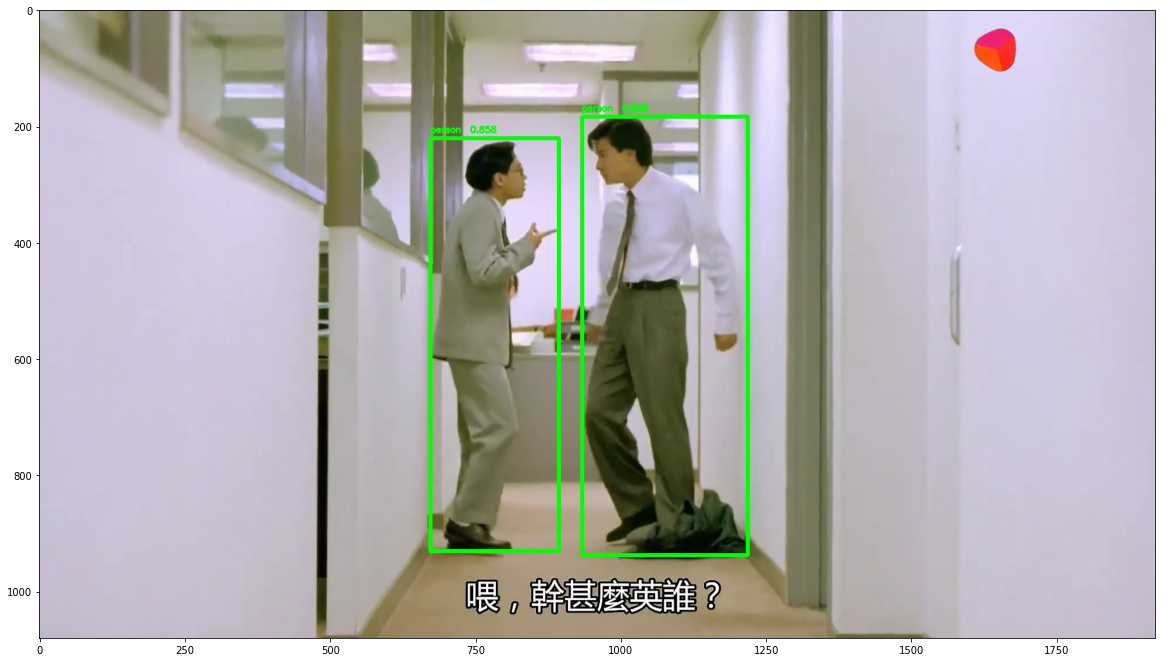

In [20]:
import matplotlib.pyplot as plt
image = plt.imread('./tutorial/demo/out.jpg')
plt.figure(figsize=(20, 20))
plt.imshow(image) 
plt.show()

If you would like to use ONNX model for inference, you need to modify the `pt_path` in yaml file to the path to ONNX model, and add `--onnx` arguments when you execute `inference.py`. 

# Evaluation 
In this section, we will evaluate our trained model on COCO128 dataset. Execute commands in the folder `yolov5` and the outputs are as following:

In [22]:
!python test.py --weights runs/train/exp/weights/best.pt --verbose

Namespace(augment=False, batch_size=32, conf_thres=0.001, data='data/coco128.yaml', device='', exist_ok=False, img_size=640, iou_thres=0.65, name='exp', project='runs/test', save_conf=False, save_json=False, save_txt=False, single_cls=False, task='val', verbose=True, weights=['runs/train/exp/weights/best.pt'])
Using torch 1.9.0+cu102 CUDA:0 (Tesla T4, 15109MB)

Fusing layers... 
Model Summary: 164 layers, 6772285 parameters, 0 gradients
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
***cache_path ../coco128/labels/train2017.cache
Scanning labels ../coco128/labels/train2017.cache (126 found, 0 missing, 2 empty, 0 duplicate, for 128 imag